# LAZY LEARNING EXERCISE - IML

## PEN-BASED DATA SET


In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from urllib import request
from scipy.io import arff
from io import StringIO
from sklearn.preprocessing import LabelEncoder

from tools import eda 
from tools import preprocess as prep

### Read an example of the Pen-Based data set

In [2]:
path = '../datasets/datasetsCBR/pen-based/pen-based.fold.000000.test.arff'

# Read the data set
df_test = eda.read_arff(path_data=path, url_data=None)

df_test.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17
0,0.39,0.82,0.68,1.00,1.00,0.86,0.72,0.61,0.91,0.44,0.83,0.15,0.41,0.00,0.00,0.14,b'3'
1,0.33,0.70,0.46,1.00,0.59,0.80,0.34,0.48,0.01,0.21,0.00,0.02,0.50,0.00,1.00,0.06,b'2'
2,0.84,0.70,0.94,1.00,0.48,0.90,0.60,0.66,1.00,0.68,0.78,0.32,0.47,0.00,0.00,0.02,b'9'
3,0.05,0.68,0.45,1.00,0.87,0.83,0.55,0.45,0.10,0.13,0.00,0.12,0.57,0.00,1.00,0.09,b'2'
4,0.42,0.97,0.00,0.75,0.84,0.73,0.51,1.00,0.13,0.86,1.00,0.73,0.71,0.34,0.18,0.00,b'9'


In [3]:
splits, metadata = eda.split(df_test, cat_features=None,response='a17')
X_num = splits['X_num']
X_cat = splits['X_cat'] # No categorical features

In [4]:
# True labels of all datapoints
y = splits['y']['a17'].values
print(y)
print(len(y))

[3 2 9 ... 9 1 7]
1098


In [5]:
X_num.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,0.39,0.82,0.68,1.00,1.00,0.86,0.72,0.61,0.91,0.44,0.83,0.15,0.41,0.00,0.00,0.14
1,0.33,0.70,0.46,1.00,0.59,0.80,0.34,0.48,0.01,0.21,0.00,0.02,0.50,0.00,1.00,0.06
2,0.84,0.70,0.94,1.00,0.48,0.90,0.60,0.66,1.00,0.68,0.78,0.32,0.47,0.00,0.00,0.02
3,0.05,0.68,0.45,1.00,0.87,0.83,0.55,0.45,0.10,0.13,0.00,0.12,0.57,0.00,1.00,0.09
4,0.42,0.97,0.00,0.75,0.84,0.73,0.51,1.00,0.13,0.86,1.00,0.73,0.71,0.34,0.18,0.00


In [6]:
print(f'# instances: {len(X_num)} | # features: {len(X_num.columns)}')
print(f'# num_features: {len(X_num.columns)}')

# instances: 1098 | # features: 16
# num_features: 16


In [7]:
def check_null(X):
    return X.isnull().sum()
print(f'Numerical: {eda.check_null(X_num)}')

Numerical: a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
dtype: int64


In [8]:
X_norm_test = (X_num - X_num.min()) / (X_num.max() - X_num.min())
X_norm_test.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,0.39,0.82,0.68,1.00,1.00,0.86,0.72,0.61,0.91,0.44,0.83,0.15,0.41,0.00,0.00,0.14
1,0.33,0.70,0.46,1.00,0.59,0.80,0.34,0.48,0.01,0.21,0.00,0.02,0.50,0.00,1.00,0.06
2,0.84,0.70,0.94,1.00,0.48,0.90,0.60,0.66,1.00,0.68,0.78,0.32,0.47,0.00,0.00,0.02
3,0.05,0.68,0.45,1.00,0.87,0.83,0.55,0.45,0.10,0.13,0.00,0.12,0.57,0.00,1.00,0.09
4,0.42,0.97,0.00,0.75,0.84,0.73,0.51,1.00,0.13,0.86,1.00,0.73,0.71,0.34,0.18,0.00


### Function that automatically reads the files and performs the pre-processing

In [9]:
def read_train_test_files(fold_number):
    import glob
    train_arff_files = glob.glob('../datasets/datasetsCBR/pen-based/*.train.arff')
    test_arff_files = glob.glob('../datasets/datasetsCBR/pen-based/*.test.arff')
#     test_arff_files = glob.glob('datasetsCBR/pen-based/*.test.arff')
    
    TrainTotal = []
    Y_TrainTotal = []
    
    TestTotal = []
    Y_TestTotal = []
    
    for file in train_arff_files:
        

        df_train = eda.read_arff(path_data=file, url_data=None)
        splits, metadata = eda.split(df_train, cat_features=None,response='a17')
        X_num = splits['X_num']
        X_cat = splits['X_cat'] # No categorical features
        y_train = splits['y']['a17'].values
        X_norm_train = (X_num - X_num.min()) / (X_num.max() - X_num.min())
        TrainTotal.append(X_norm_train)
        Y_TrainTotal.append(y_train)
        
    
    for file in test_arff_files: 
       
        df_test = eda.read_arff(path_data=file, url_data=None)
        splits, metadata = eda.split(df_test, cat_features=None,response='a17')
        X_num = splits['X_num']
        X_cat = splits['X_cat'] # No categorical features
        y_test = splits['y']['a17'].values
        X_norm_test = (X_num - X_num.min()) / (X_num.max() - X_num.min())
        TestTotal.append(X_norm_test)
        Y_TestTotal.append(y_test)
        
        
    return TrainTotal[fold_number-1],Y_TrainTotal[fold_number-1], TestTotal[fold_number-1], Y_TestTotal[fold_number-1]



## KNN algorithm with different k, r, voting and retention methods

In [3]:
import operator
from scipy.stats import mode
from math import sqrt
from joblib import Parallel, delayed

class KIblAlgorithm:
    def __init__(self,r,k,voting_method,retention_type):
        
        """Class function that computes the K-nearest neighbor algorithm using as a distance the Minskowski 
        metric."""
        
        
        """MENU: you should chose a r and k value as well as one voting method and one retention type among
        the following lists."""
        
        """ r values: 1,2 and 3 """
        
        """ k values: 1,3,5 and 7 """
        
        """Voting method:
        
        'most_voted'
        'modified plurality' 
        
        """
        
        """Retention type:
        
        'nr' (Never retain)
        'ar' (Always retain)
        'df' (Different Class retention)
        'dd' (Degree of Desagreement)
        
        """
        
        self.r = r
        self.k = k
        self.voting_method = voting_method
        

        assert retention_type in ['nr', 'ar', 'df', 'dd']
        self.retention_type = retention_type
        
    
    def minskowski_metric(self,p1,p2,length):
        """Minskowski distance between two points."""
        distance =0.0
        for i in range(length):
            distance += (abs(p1[i]-p2[i])**self.r)

        return distance**(1/self.r)
    
    def most_voted(self,neighbors,TrainLabels):
        Count = {}  # to get most frequent class of rows 
        for i in range(len(neighbors)):
            label = TrainLabels[neighbors[i]]
        
            if label in Count:
                Count[label] += 1
            else:
                Count[label] = 1
        
        sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True) # We sort from most frequent label to less frequent
    
        return sortcount
    
    def modified_plurality(self,neighbors,TrainLabels):
        
        Count = {}  # to get most frequent class of rows 
        for i in range(len(neighbors)):
            label = TrainLabels[neighbors[i]]
        
            if label in Count:
                Count[label] += 1
            else:
                Count[label] = 1
        
        sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True) # We sort from most frequent label to less frequent
    
        # 2) Modified plurality
        if len(sortcount) == 1:
            return sortcount
        
        while sortcount[0][1] == sortcount[1][1]:
            neighbors = neighbors[:-1]
            
            Count = {}  # to get most frequent class of rows 
            for i in range(len(neighbors)):
                label = TrainLabels[neighbors[i]]
                if label in Count:
                    Count[label] += 1
                else:
                    Count[label] = 1
            sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True) # We sort from most frequent label to lenttss frequent

            # print('There is a Tie')

            if len(sortcount)==1:
                # print(sortcount)
                break
            elif sortcount[0][1] != sortcount[1][1]:
                # print(sortcount)
                break

        else:
            pass
            # print('No Tie')
        
        return sortcount 
    
    def classifier(self,TrainMatrix,TestInstance,TrainLabels):
        """K-Instance-Based Learning algorithm"""
        import operator

        distances = {}
        length = TrainMatrix.shape[1]

        # Compute distances between one Test Incance (current test instance) and all the TrainMatrix rows
        # for i in range(len(TrainMatrix)): # each row 
            # dist = self.minskowski_metric(TrainMatrix[i], TestInstances, length) # Selecting data by row numbers (.iloc)
            # distances[i] = dist
        dists = np.linalg.norm(TrainMatrix-TestInstance,ord=self.r, axis=1)
        items = list(range(len(dists)))
        for i in items:
            distances[i] = dists[i]
        sortdist = sorted(distances.items(), key=operator.itemgetter(1)) # sort in decreasing order

        # Find the Train Instances that are close to the Train Instance
        neighbors = []
        for i in range(self.k):
            neighbors.append(sortdist[i][0]) # we choose the index of the K most similar instances (min distance)
        
        if self.voting_method == 'most_voted': 
            sortcount = self.most_voted(neighbors,TrainLabels)
        else: 
            sortcount = self.modified_plurality(neighbors,TrainLabels)
        
        return (sortcount[0][0],neighbors)
    
    
    def update_instance_base(self, instance_index, TrainMatrix, TestInstances, TrainLabels, TestLabels, predicted, neighbors=None):
        def instance_base_with_current_instance():
            newTrainMatrix = TrainMatrix.copy()
            newTrainLabels = TrainLabels.copy()
            instance = TestInstances[instance_index]
            label = TestLabels[instance_index]
            return np.append(newTrainMatrix, [instance], axis=0), np.append(newTrainLabels, [label], axis=0)

        if self.retention_type == 'nr':
            return TrainMatrix, TrainLabels
        elif self.retention_type == 'ar':
            return instance_base_with_current_instance()
        elif self.retention_type == 'df':
            if TestLabels[instance_index] == predicted:
                return TrainMatrix, TrainLabels
            else:
                return instance_base_with_current_instance()
        elif self.retention_type == 'dd':
            n_clases = len(np.unique(TestLabels))
            majority = mode([TrainLabels[n] for n in neighbors])[0][0]
            # print(majority)
            n_majority_classes = len([x for x in neighbors if TrainLabels[x] == majority])
            n_remaining_classes = len(neighbors) - n_majority_classes
            # print(n_clases, n_majority_classes, n_remaining_classes)
            d = n_remaining_classes/((n_clases - 1) * n_majority_classes if n_clases > 1 else 1)
            # print(d)
            if d >= 0.5:
                return instance_base_with_current_instance()
            else:
                return TrainMatrix, TrainLabels
        else:
            print('Wrong retention_type')
    
    
    def fit(self,TrainMatrix,TestInstances, TrainLabels, TestLabels):
        
        classification = []
        
        for i in range(len(TestInstances)):
            label,neighbors = self.classifier(TrainMatrix,TestInstances[i],TrainLabels)
            # print(TrainMatrix.shape)
            TrainMatrix, TrainLabels = self.update_instance_base(i, TrainMatrix, TestInstances, TrainLabels, TestLabels, label, neighbors)
            # print(TrainMatrix.shape)
            classification.append((i,label))
        
        return classification 


In [68]:
knn = KIblAlgorithm(k=1, r=1,voting_method='most_voted',retention_type='nr')
    
start = time.time()
TestPrediction = knn.fit(Train.values,Test.values,Y_Train,Y_Test)
end = time.time()
accuracy(Y_Test,TestPrediction), end-start

(1.0, 6.521752119064331)

In [4]:
result_accuracies, result_times = [], []
accuracies, times = {}, {}
import time

def accuracy(Y_Test,TestClassification):
    from sklearn import metrics
    Y_pred = [label for instance,label in TestClassification]
    return metrics.accuracy_score(Y_Test, Y_pred)


def get_experiment_id(k, r, voting_method, retention_type):
    key = f'k={k},r={r},v={voting_method},r={retention_type}'
    return key

def execute_experiment(k, r,voting_method,retention_type, i):
    # Read fold i
    # Parallel(n_jobs=2)(delayed(execute_experiment)(i ** 2) for i in range(10))
    key = get_experiment_id(k, r,voting_method,retention_type)
    Train,Y_Train, Test, Y_Test = read_train_test_files('bal', fold_number=i+1)
    # Evaluate
    knn = KIblAlgorithm(k=k, r=r,voting_method=voting_method,retention_type=retention_type)
    
    start = time.time()
    TestPrediction = knn.fit(Train.values,Test.values,Y_Train,Y_Test)
    end = time.time()

    return accuracy(Y_Test,TestPrediction), end-start

    if key not in accuracies:
        accuracies[key] = [accuracy(Y_Test,TestPrediction)]
    else:
        accuracies[key].append(accuracy(Y_Test,TestPrediction))

    if key not in times:
        times[key] = [end-start]
    else:
        times[key].append(end-start)


def find_best_KIBL():
    result_accuracies, result_times = [], []
    for k in [1, 3, 5, 7]:
        for r in [1,2,3]:
            for voting_method in ['most_voted', 'modified plurality']:
                for retention_type in ['nr', 'ar', 'df', 'dd']:
                    # Test for 10 folds
                    # results = Parallel(n_jobs=2)(delayed(execute_experiment)(k=k, r=r,voting_method=voting_method,retention_type=retention_type,i=i) for i in range(10))
                    #accuracies, times = {}, {}
                    for i in range(10):
                        # Read fold i
                    
                        Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number=i+1)
                        # Evaluate
                        knn = KIblAlgorithm(k=k, r=r,voting_method=voting_method,retention_type=retention_type)
                        
                        start = time.time()
                        TestPrediction = knn.fit(Train.values,Test.values,Y_Train,Y_Test)
                        end = time.time()

                        key = get_experiment_id(k,r,voting_method, retention_type)
                        if key not in accuracies:
                            accuracies[key] = [accuracy(Y_Test,TestPrediction)]
                        else:
                            accuracies[key].append(accuracy(Y_Test,TestPrediction))
                        
                        if key not in times:
                            times[key] = [end-start]
                        else:
                            times[key].append(end-start)

                    # accs = [r[0] for r in results]
                    # tms = [r[1] for r in results]
                    experiment_id  = get_experiment_id(k,r,voting_method, retention_type)
                    print(f'k={k} r={r} voting={voting_method} retention={retention_type} ==> mean_accuracy={np.mean(accuracies[experiment_id])} time= {np.mean(times[experiment_id])}')
                    # print(f'k={k} r={r} voting={voting_method} retention={retention_type} ==> mean_accuracy={np.mean(accs)} time= {np.mean(tms)}')
                    
                    # print(f'k={k} r={r} voting={voting_method} retention={retention_type} ==> mean_accuracy={np.mean(accuracies)} time={np.mean(times)}')
                    # result_accuracies.append(np.mean(accuracies[experiment_id]))
                    # result_times.append(np.mean(times[experiment_id]))
    
    return accuracies, times

### Find the best K-IBL by computing the accuracy and time of all the 96 algorithms

Note: it takes a long time, that's why it is commented.

In [17]:
# find_best_KIBL()

k=1 r=1 voting=most_voted retention=nr ==> mean_accuracy=1.0 time= 6.691504311561585
k=1 r=1 voting=most_voted retention=ar ==> mean_accuracy=1.0 time= 7.1217159032821655
k=1 r=1 voting=most_voted retention=df ==> mean_accuracy=1.0 time= 6.774139499664306
k=1 r=1 voting=most_voted retention=dd ==> mean_accuracy=1.0 time= 6.997730231285095
k=1 r=1 voting=modified plurality retention=nr ==> mean_accuracy=1.0 time= 6.628200626373291
k=1 r=1 voting=modified plurality retention=ar ==> mean_accuracy=1.0 time= 7.147605443000794
k=1 r=1 voting=modified plurality retention=df ==> mean_accuracy=1.0 time= 6.6393026351928714
k=1 r=1 voting=modified plurality retention=dd ==> mean_accuracy=1.0 time= 6.674480557441711
k=1 r=2 voting=most_voted retention=nr ==> mean_accuracy=1.0 time= 6.642084646224975
k=1 r=2 voting=most_voted retention=ar ==> mean_accuracy=1.0 time= 7.494874787330628
k=1 r=2 voting=most_voted retention=df ==> mean_accuracy=1.0 time= 6.749120759963989
k=1 r=2 voting=most_voted reten

({'k=1,r=1,v=most_voted,r=nr': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=most_voted,r=ar': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=most_voted,r=df': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=most_voted,r=dd': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=modified plurality,r=nr': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=modified plurality,r=ar': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=modified plurality,r=df': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=1,v=modified plurality,r=dd': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'k=1,r=2,v=most_voted,r=nr': [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   

### Statistical analysis to select the best K-IBL algorithm

In [142]:
import json

with open('accuracies.json') as json_file:
    accuracies_json = json.load(json_file)

accs = [accuracies_json[k] for k in accuracies_json]
len(accs)

from scipy.stats import friedmanchisquare

friedmanchisquare(*accs)

! pip install scikit-posthocs

from scikit_posthocs import posthoc_dunn

p_values = posthoc_dunn(a=accs, p_adjust='holm', sort=True)
print('Post hocs dunn p-values: ')
p_values.head()



You should consider upgrading via the 'pip install --upgrade pip' command.
Post hocs dunn p-values 


,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
1,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000538,0.000538,0.002931,0.002544,0.004501,0.002931,0.002931,0.002544,0.004501,0.002931
2,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000538,0.000538,0.002931,0.002544,0.004501,0.002931,0.002931,0.002544,0.004501,0.002931
3,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000538,0.000538,0.002931,0.002544,0.004501,0.002931,0.002931,0.002544,0.004501,0.002931
4,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000538,0.000538,0.002931,0.002544,0.004501,0.002931,0.002931,0.002544,0.004501,0.002931
5,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,0.000538,0.000538,0.002931,0.002544,0.004501,0.002931,0.002931,0.002544,0.004501,0.002931


In [141]:
pvalues = p_values.values
classifiers = accs.copy()
best = 0
best_acc = np.mean(accs[0])
for i in range(96):
    acc_i = np.mean(accs[i])
    rejected = np.where(pvalues[i,:]<0.05)[0]
    rejected = [x for x in rejected if x != i]
    best_r = None
    best_r_acc = 0 
    for j in rejected:
        acc_j = np.mean(accs[j])
        if acc_j > best_r_acc:
            best_r = j
            best_r_acc = acc_j
    if best_r_acc > best_acc:
        best = best_r
        best_acc = best_r_acc

print('Best K-IBL algorithm (index):',best, 'Associated accuracy:',best_acc)


pvalues = p_values.values
classifiers = accs.copy()
best = 0
best_acc = np.mean(accs[0])

i=0
notrejected = set(np.where(pvalues[i,:]>0.05)[0]) | set([i])
print('\nNon-rejected algorithms (index):\n',notrejected)
print('\nNumber of non-rejected algorithms:',len(notrejected))


accs_result = [accs[i] for i in notrejected]

print('\n List of non-rejected algorithms by index:\n')
for i in notrejected:
    print(i, '\t', list(accuracies_json.keys())[i], '\t', np.mean(accs[i]))

Best K-IBL algorithm (index): 0 Associated accuracy: 1.0

Non-rejected algorithms (index):
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71}

Number of non-rejected algorithms: 67

 List of non-rejected algorithms by index:

0 	 k=1,r=1,v=most_voted,r=nr 	 1.0
1 	 k=1,r=1,v=most_voted,r=ar 	 1.0
2 	 k=1,r=1,v=most_voted,r=df 	 1.0
3 	 k=1,r=1,v=most_voted,r=dd 	 1.0
4 	 k=1,r=1,v=modified plurality,r=nr 	 1.0
5 	 k=1,r=1,v=modified plurality,r=ar 	 1.0
6 	 k=1,r=1,v=modified plurality,r=df 	 1.0
7 	 k=1,r=1,v=modified plurality,r=dd 	 1.0
8 	 k=1,r=2,v=most_voted,r=nr 	 1.0
9 	 k=1,r=2,v=most_voted,r=ar 	 1.0
10 	 k=1,r=2,v=most_voted,r=df 	 1.0
11 	 k=1,r=2,v=most_voted,r=dd 	 1.0
12 	 k=1,r=2,v=modified plurality,r=nr 	 1.0
13 	 k=1,r=2,v=modified plurality,r=ar 	 1.0
14 	 k=1,

### Justification with graphic representions

In [18]:
import json
with open('accuracies.json', 'w') as fp:
    json.dump(accuracies, fp)
with open('times.json', 'w') as fp:
    json.dump(times, fp)

In [191]:
##### import json
k1 =[]
k3 =[]
k5 =[]
k7 =[]

tr1_k1 =[]
tr2_k1 =[]
tr3_k1 =[]

tr1_k3 =[]
tr2_k3 =[]
tr3_k3 =[]

tr1_k5 =[]
tr2_k5 =[]
tr3_k5 =[]

tr1_k7 =[]
tr2_k7 =[]
tr3_k7 =[]



with open('accuracies.json') as json_file:
    data = json.load(json_file)
    with open('times.json') as json_file2:
        time = json.load(json_file2)
            
    
        for p in data['k=1,r=1,v=most_voted,r=nr']:
            k1.append(p)
        for p in data['k=3,r=1,v=most_voted,r=nr']:
            k3.append(p)
        for p in data['k=5,r=1,v=most_voted,r=nr']:
            k5.append(p)
        for p in data['k=7,r=1,v=most_voted,r=nr']:
            k7.append(p)
        
        for p in time['k=1,r=1,v=most_voted,r=nr']:
            tr1_k1.append(p)
        for p in time['k=1,r=2,v=most_voted,r=nr']:
            tr2_k1.append(p)
        for p in time['k=1,r=3,v=most_voted,r=nr']:
            tr3_k1.append(p)
            
        for p in time['k=3,r=1,v=most_voted,r=nr']:
            tr1_k3.append(p)
        for p in time['k=3,r=2,v=most_voted,r=nr']:
            tr2_k3.append(p)
        for p in time['k=3,r=3,v=most_voted,r=nr']:
            tr3_k3.append(p)
        
        for p in time['k=5,r=1,v=most_voted,r=nr']:
            tr1_k5.append(p)
        for p in time['k=5,r=2,v=most_voted,r=nr']:
            tr2_k5.append(p)
        for p in time['k=5,r=3,v=most_voted,r=nr']:
            tr3_k5.append(p)
            
        for p in time['k=7,r=1,v=most_voted,r=nr']:
            tr1_k7.append(p)
        for p in time['k=7,r=2,v=most_voted,r=nr']:
            tr2_k7.append(p)
        for p in time['k=7,r=3,v=most_voted,r=nr']:
            tr3_k7.append(p)

We have modified the time of the set with r=3 and k=7 because during the execution time we had to sleep the computer for some minutes and the real time of computation was not well computed. For this reason we decided to choose the mean of the correct time values. 

In [173]:
print('Original tr3_k5:',tr3_k5,'\n')
replace = np.mean(tr3_k5[2:])
tr3_k5[0] = replace
tr3_k5[1] = replace
print('Modified tr3_k5:',tr3_k5)

Original tr3_k5: [31.51245903968811, 637.1491148471832, 9.247772216796875, 9.324599981307983, 9.217637777328491, 9.015958786010742, 9.161888837814331, 9.024791955947876, 9.035461187362671, 9.916890144348145] 

Modified tr3_k5: [9.24312511086464, 9.24312511086464, 9.247772216796875, 9.324599981307983, 9.217637777328491, 9.015958786010742, 9.161888837814331, 9.024791955947876, 9.035461187362671, 9.916890144348145]


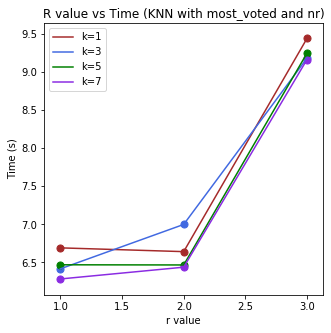

In [174]:
fig = plt.figure(figsize=(5, 5))

plt.plot([1,2,3], [np.mean(tr1_k1),np.mean(tr2_k1),np.mean(tr3_k1)],c= 'brown',label='k=1');
plt.scatter(x=1, y=np.mean(tr1_k1),c= 'brown' ,s=50, cmap='viridis');
plt.scatter(x=2, y=np.mean(tr2_k1),c= 'brown' ,s=50, cmap='viridis');
plt.scatter(x=3, y=np.mean(tr3_k1),c= 'brown' ,s=50, cmap='viridis');

plt.plot([1,2,3], [np.mean(tr1_k3),np.mean(tr2_k3),np.mean(tr3_k3)],c= 'royalblue',label='k=3');
plt.scatter(x=1, y=np.mean(tr1_k3),c= 'royalblue' ,s=50, cmap='viridis');
plt.scatter(x=2, y=np.mean(tr2_k3),c= 'royalblue' ,s=50, cmap='viridis');
plt.scatter(x=3, y=np.mean(tr3_k3),c= 'royalblue' ,s=50, cmap='viridis');

plt.plot([1,2,3], [np.mean(tr1_k5),np.mean(tr2_k5),np.mean(tr3_k5)],c= 'green',label='k=5');
plt.scatter(x=1, y=np.mean(tr1_k5),c= 'green' ,s=50, cmap='viridis');
plt.scatter(x=2, y=np.mean(tr2_k5),c= 'green' ,s=50, cmap='viridis');
plt.scatter(x=3, y=np.mean(tr3_k5),c= 'green' ,s=50, cmap='viridis');

plt.plot([1,2,3], [np.mean(tr1_k7),np.mean(tr2_k7),np.mean(tr3_k7)],c= 'blueviolet',label='k=7');
plt.scatter(x=1, y=np.mean(tr1_k7),c= 'blueviolet' ,s=50, cmap='viridis');
plt.scatter(x=2, y=np.mean(tr2_k7),c= 'blueviolet' ,s=50, cmap='viridis');
plt.scatter(x=3, y=np.mean(tr3_k7),c= 'blueviolet' ,s=50, cmap='viridis');


plt.xlabel('r value')
plt.ylabel('Time (s)')
plt.title('R value vs Time (KNN with most_voted and nr)')
plt.legend(loc='upper left')
plt.savefig(fname='pen-based-r_time')
plt.show()


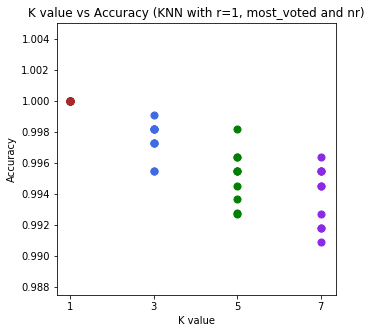

In [204]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x=[1,1,1,1,1,1,1,1,1,1], y=k1,c= 'brown' ,s=50, cmap='viridis');
plt.scatter(x=[3,3,3,3,3,3,3,3,3,3], y=k3,c= 'royalblue' ,s=50, cmap='viridis');
plt.scatter(x=[5,5,5,5,5,5,5,5,5,5], y=k5,c= 'green' ,s=50, cmap='viridis');
plt.scatter(x=[7,7,7,7,7,7,7,7,7,7], y=k7,c= 'blueviolet',s=50, cmap='viridis');
plt.ylim([0.9875,1.005])
plt.xticks(np.arange(1,9,2), np.arange(1,9,2))
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K value vs Accuracy (KNN with r=1, most_voted and nr)')
plt.savefig(fname='pen-based-accuracy_k')
plt.show()

### Best KNN algorithm cluster representation

In [220]:
Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number=1)
# Evaluate
knn = KIblAlgorithm(k=1, r=1,voting_method='most_voted',retention_type='nr')
TestPrediction = knn.fit(Train.values,Test.values,Y_Train,Y_Test)


In [222]:
print(len(Test))
print(len(Y_Test))
print(len(TestPrediction))

1102
1102
1102


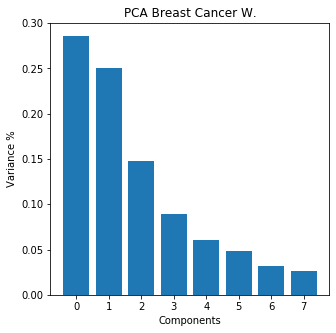

In [223]:
from sklearn.decomposition import PCA

#n_comp= len(X_num_scaled.values[0])//2
#graph_components(X_num_scaled, n_components=n_comp)

pca = PCA(n_components= len(Test.values[0])//2)
Test_PCA = pca.fit_transform(Test.values)

list_components = list(range(pca.n_components_))
plt.figure(figsize=(5,5))
plt.bar(list_components, pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.xticks(list_components)
plt.title('PCA Breast Cancer W.')
#plt.savefig('numerical_scaled_pca')
plt.show()

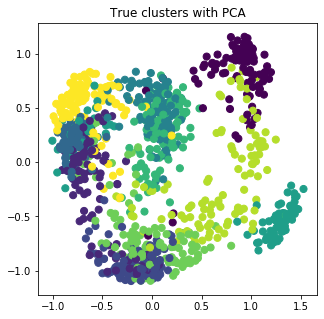

In [228]:
Test_PCA_df = pd.DataFrame(Test_PCA)
Test_PCA_df.head()

fig = plt.figure(figsize=(5, 5))
plt.scatter(Test_PCA_df.values[:, 0], Test_PCA_df.values[:, 1], c=Y_Test,
            s=50, cmap='viridis');
plt.title('True clusters with PCA')
plt.savefig(fname='pen-based_true')
plt.show()

In [213]:
Y_pred = [label for instance,label in TestPrediction]
print(len(Y_Test))
len(Y_pred)

1100


1102

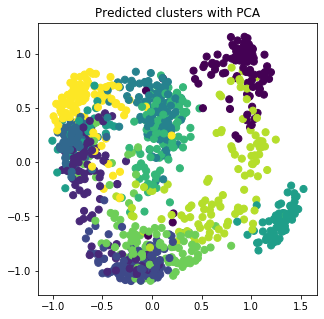

In [227]:
Test_PCA_df = pd.DataFrame(Test_PCA)
Test_PCA_df.head()

Y_pred = [label for instance,label in TestPrediction]

fig = plt.figure(figsize=(5, 5))
plt.scatter(Test_PCA_df.values[:, 0], Test_PCA_df.values[:, 1], c=Y_pred,
            s=50, cmap='viridis');
plt.title('Predicted clusters with PCA')
plt.savefig(fname='pen-based_predicted')
plt.show()

# Reduction techniques

**KNN2*

In [192]:
from scipy.spatial.distance import cdist

class KIblAlgorithm2:
    def __init__(self, k=5, r=2, voting='most'):
        self.k = k
        self.r = r # for minkowski distance
        self.voting = voting
        self.X = None
        self.y = None
        self.n_classes = None
        
    def fit(self, X, y):

        self.X = X
        self.y = y
        self.n_classes = len(np.unique(y))

        return self
    
    def minskowski(self, x1, x2, r):
        """Minskowski distance between two points."""
#         distance =0.0
#         for k in range(length):
#             distance += (abs(p1[k]-p2[k])**r)

#         return distance**(1/r)

        distance = np.sum(np.abs(x1-x2) ** r, axis=1) ** (1/r)
        
        return distance
    
    def get_policy(self, distances, voting='most'):
        
        if voting == 'most':
#             votes = np.zeros(self.n_classes, dtype=np.int)
            votes = dict.fromkeys(range(20),0)

            # find k closet neighbors and vote
            # argsort returns the indices that would sort an array
            # so indices of nearest neighbors
            # we take self.k first
            for neighbor_id in np.argsort(distances)[:self.k]:
                # this is a label corresponding to one of the closest neighbor

                if len(self.y) > neighbor_id: # for the case of ib3
                    neighbor_label = self.y[neighbor_id]
                else:
                    neighbor_label = self.y[0]
#                     print(neighbor_label)
                # which updates votes array
                votes[neighbor_label] += 1

            sortcount = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
            
            return sortcount[0][0]

        elif voting == 'plurality':
            

            for k in range(self.k, 0, -1):      
                votes = dict.fromkeys(range(20),0)
                for neighbor_id in np.argsort(distances)[:k]:
                    if len(self.y) > neighbor_id: # for the case of ib3
                        neighbor_label = self.y[neighbor_id]
                    else:
                        neighbor_label = self.y[0]
                    votes[neighbor_label] += 1
                
                sortcount = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
                
                if len(sortcount) == 1:
                    return sortcount[0][0]    
                
                if sortcount[0][1] == sortcount[1][1]:
                    continue
                else:
                    return sortcount[0][0]
        
    
    def predict(self, X_test):

        y_pred = []

        for x in X_test:
            distances = self.minskowski(self.X, x, self.r)
#             print(distances)
            label = self.get_policy(distances, voting=self.voting)
            y_pred.append(label)

        return y_pred

**Reduction algorithms:**
- ENN
- CNN 
- IB3
- DROP1
- DROP2

In [193]:
from scipy.spatial.distance import cdist

class reductionKIblAlgorithm:
    def __init__(self, k=5, r=2, 
                 voting='most', 
#                  retention='nr',
                 reduction='cnn',
                 random_state=42):

        self.k = k
        self.r = r
        self.voting = voting
#         self.retention = retention
        self.reduction = reduction
        self.random_state = random_state
        self.knn = KIblAlgorithm2(k, r, voting)
#         self.knn = KIblAlgorithm(r=r, k=k, 
#                     voting_method=voting, 
#                     retention_type=retention)
        self.knn_reduced = self.knn
        self.indexes_rm = None
        self.X_reduced = None
        self.y_reduced = None
        
    def apply_reduction(self, X, y, 
                        method='cnn', random_state=42):
        
        random_instance = np.random.RandomState(random_state)
        
        def cnn(X_train, y_train):
            """
                Incremental algorithm. Begins with random instances 
                belonging to each class, then increasing the training 
                data by inserting those instances that misclassified.
            """
            # Start gathering one instance for each class, randomly.
            classes = np.unique(y_train)
            indexes_reduced = []
            for cl in classes:
                y_indexes = np.where(y_train == cl)[0]
                index = random_instance.choice(y_indexes, 1)[0]
                indexes_reduced.append(index)

            x_train_reduced = X_train[indexes_reduced]
            y_train_reduced = y_train[indexes_reduced]

            for index, (x_instance, y_instance) in enumerate(zip(X_train, y_train)):

                best_knn = self.knn
                best_knn.fit(x_train_reduced, y_train_reduced)

                y_pred_instance = best_knn.predict(np.asarray([x_instance]))
          
                # If misclassified, add to reduced set.
                if y_pred_instance != y_instance:
                    x_train_reduced = np.vstack([x_train_reduced, x_instance])
                    y_train_reduced = np.hstack([y_train_reduced, y_instance])
                    indexes_reduced = np.hstack([indexes_reduced, index])

            # Only unique indexes
            indexes_reduced = np.unique(indexes_reduced)
            
            return x_train_reduced, y_train_reduced, indexes_reduced
        
        def enn(X_train, y_train):
            """
                Non-incremental algorithm. Each instance is removed if it 
                does not agree with the majority of its knn.
            
            """
            classes = np.unique(y_train)
            
            # Start with all training data.
            indexes_reduced = np.arange(len(X_train))

            x_train_reduced = X_train
            y_train_reduced = y_train

            for index, (x_instance, y_instance) in enumerate(zip(X_train, y_train)):

                best_knn = self.knn
                best_knn.fit(x_train_reduced, y_train_reduced)
                y_pred_instance = best_knn.predict(np.asarray([x_instance]))

                # If misclassified, remove from the initial set.
                if y_pred_instance != y_instance:
                    x_train_reduced = np.delete(x_train_reduced, [index], axis=0)
                    y_train_reduced = np.delete(y_train_reduced, [index], axis=0)
                    indexes_reduced = np.delete(indexes_reduced, [index], axis=0)
            
            return x_train_reduced, y_train_reduced, indexes_reduced           
        
        def ib3(X_train, y_train):
            """
                It is an incremental algorith. It addresses the IB2's problem 
                of keeping noisy instances by retaining only acceptable 
                misclassified instances.
            """
            classes = np.unique(y_train)
            
            # Start with the first element.
            x_train_reduced = np.asarray([X_train[0,:]])
            y_train_reduced = np.asarray([y_train[0]])
            acceptable = np.array([0])
            
            lower = lambda p,z,n: (p + (z**2)/(2*n) - z*((p*(1-p)/n + (z**2)/(4*n**2)))**0.5)/(1 + (z**2)/n)
            upper = lambda p,z,n: (p + (z**2)/(2*n) + z*((p*(1-p)/n + (z**2)/(4*n**2)))**0.5)/(1 + (z**2)/n)
               
            for index, (x_instance, y_instance) in enumerate(zip(X_train, y_train)):

                best_knn = self.knn
                best_knn.fit(x_train_reduced, y_train_reduced)
#                 print(x_train_reduced)
                y_pred_instance = best_knn.predict(np.asarray([x_instance]))

                # This part is similar to IB2
                if y_pred_instance != y_instance:
                    x_train_reduced = np.vstack([x_train_reduced, x_instance])
                    acceptable = np.hstack([acceptable, index])
                
                    
                incorrect_class = 0
                correct_class = 0
                
                # Not going on onced got the expected value
                if len(acceptable) > len(y_train)/30: 
                    break
                    
                # This part differ from IB2, just acceptable instance are kept.
                # Count the number of incorrect and correct classification
                for x_instance_reduced in x_train_reduced:
                    best_knn = self.knn
                    best_knn.fit(x_train_reduced, y_train_reduced)
                    y_pred_instance_reduced = best_knn.predict(np.asarray([x_instance_reduced]))
                    
                    if y_pred_instance_reduced != y_instance:
                        incorrect_class += 1
                    else:
                        correct_class += 1
                
                n = incorrect_class + correct_class
                p = correct_class / n
                
                # For acceptance
                z = 0.9
                lower_bound = lower(p, z, n)
                upper_bound = upper(p, z, n)
#                 print(lower_bound, upper_bound, incorrect_class, correct_class)
                if (incorrect_class/n <= lower_bound) or (correct_class/n >= upper_bound):
                    acceptable = np.hstack([acceptable, index])
                

                
                # For removing
                z = 0.7
                lower_bound = lower(p, z, n)
                upper_bound = upper(p, z, n)
                
                if (incorrect_class/n <= lower_bound) or (correct_class/n >= upper_bound):
                    acceptable = np.delete(acceptable, [index], axis=0)                 

#                 if p == 1:
#                     break
                    
            x_train_reduced = X_train[acceptable]
            y_train_reduced = y_train[acceptable]
            indexes_reduced = acceptable
            
            return x_train_reduced, y_train_reduced, indexes_reduced    
  
        def drop1(X_train, y_train):
            """
                This is a non-incremental algorithm. From the paper, 
                it can be translated as: "It goes over the dataset in the provided order, 
                and removes those instances whose removal does not decrease 
                the accuracy of the 1-NN rule in the remaining dataset"
            """
            classes = np.unique(y_train)
            
            # Start with all training data.
            indexes_reduced = np.arange(int(len(X_train)/2))

            x_train_reduced = X_train[:int(len(X_train)/2)]
            y_train_reduced = y_train[:int(len(X_train)/2)]

            c = 0
            for index, (x_instance, y_instance) in enumerate(zip(X_train, y_train)):

#                 print(index)
                best_knn = self.knn
                best_knn.fit(x_train_reduced, y_train_reduced)
                y_pred_initial = best_knn.predict(x_train_reduced)
                
                acc_initial = accuracy_score(y_pred_initial, y_train_reduced)
                

                # Removes one instance from the initial set.
                x_train_reduced_t = np.delete(x_train_reduced, [index], axis=0)
                y_train_reduced_t = np.delete(y_train_reduced, [index], axis=0)
                indexes_reduced_t = np.delete(indexes_reduced, [index], axis=0)
                
                # Fit again using a 1-nn in the remaining data.
                best_1nn = KIblAlgorithm2(k=1, r=self.r, 
                                         voting=self.voting)
                
                best_1nn.fit(x_train_reduced_t, y_train_reduced_t)
                y_pred_1nn_without_instance = best_1nn.predict(x_train_reduced_t)           
                
                acc_after = accuracy_score(y_pred_1nn_without_instance, y_train_reduced_t)
                
                # if accuracy after removing the instance is greater than initial, then 
                # remove from the initial set.
                if acc_after >= acc_initial:
                    x_train_reduced = np.delete(x_train_reduced, [index], axis=0)
                    y_train_reduced = np.delete(y_train_reduced, [index], axis=0)
                    indexes_reduced = np.delete(indexes_reduced, [index], axis=0)
                    
                # Not going on onced got the expected value
                if acc_after == acc_initial:
#                     print('ssss')
                    c += 1
                    break 
                if c >= 2:
                    break
#                 if len(y_train_reduced) < len(y_train): 
#                     break
   
            return x_train_reduced, y_train_reduced, indexes_reduced      
        
        def drop2(X_train, y_train):
            """
                This is a non-incremental algorithm. Similar to DROP1 but 
                the accuracy of the 1-NN rule is done in the original dataset".
                
                Note: A preprocessing is needed before calculating the accuracy:
                "starts with those which are furthest from their nearest "enemy" 
                (two instances are said to be "enemies" if they belong to different classes)".
                Hence, this is a partial implementation of drop2.
            """
            classes = np.unique(y_train)
            
            # Start with all training data.
            indexes_reduced = np.arange(int(len(X_train)/3))

            x_train_reduced = X_train[:int(len(X_train)/3)]
            y_train_reduced = y_train[:int(len(X_train)/3)]

            
            
            best_knn = self.knn
            best_knn.fit(X_train, y_train)
            y_pred_initial = best_knn.predict(X_train)
            acc_initial = accuracy_score(y_pred_initial, y_train)
            
            c = 0
            for index, (x_instance, y_instance) in enumerate(zip(X_train, y_train)):


                # Removes one instance from the initial set.
                x_train_reduced_t = np.delete(x_train_reduced, [index], axis=0)
                y_train_reduced_t = np.delete(y_train_reduced, [index], axis=0)
                indexes_reduced_t = np.delete(indexes_reduced, [index], axis=0)
                
                # Fit again using a 1-nn in the remaining data.
                best_1nn = KIblAlgorithm2(k=1, r=self.r, 
                                         voting=self.voting)
                
                best_1nn.fit(x_train_reduced_t, y_train_reduced_t)
                y_pred_1nn_without_instance = best_1nn.predict(x_train_reduced_t)           
                
                acc_after = accuracy_score(y_pred_1nn_without_instance, y_train_reduced_t)
                
                # if accuracy after removing the instance is greater than initial, then 
                # remove from the initial set.
                if acc_after >= acc_initial:
                    x_train_reduced = np.delete(x_train_reduced, [index], axis=0)
                    y_train_reduced = np.delete(y_train_reduced, [index], axis=0)
                    indexes_reduced = np.delete(indexes_reduced, [index], axis=0)
                
                # Not going on onced got the expected value
#                 if acc_after == acc_initial:
#                     break 
                if acc_after == acc_initial:
#                     print('ssss')
                    c += 1
                    break 
                if c >= 2:
                    break
                    
            return x_train_reduced, y_train_reduced, indexes_reduced         
        
        if method == 'cnn':
            return cnn(X, y)
        elif method == 'enn':
            return enn(X, y)
        elif method == 'ib3':
            return ib3(X, y)
        elif method == 'drop1':
            return drop1(X, y)
        elif method == 'drop2':
            return drop2(X, y)
    
    def fit(self, X, y):

        X_reduced, y_reduced, indexes_rm = self.apply_reduction(X, y, 
                                             self.reduction,
                                             self.random_state)
        
        self.knn_reduced.fit(X_reduced, y_reduced)
        
        self.X_reduced = X_reduced
        self.y_reduced = y_reduced
        self.indexes_rm = indexes_rm
        
        return self

        
    def predict(self, X):

        y_pred = self.knn_reduced.predict(X)

        return y_pred

## Reduction algorithms evaluation with the best K-IBL algorithm 

In [10]:
fold_number = 1
Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number)
Test.values.shape

(1098, 16)

In [11]:
%%time
Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number=1)
    

from sklearn.metrics import accuracy_score

knn = KIblAlgorithm2(r=1, k=1, voting='most')
y_pred = knn.fit(Train.values, Y_Train)

y_pred = knn.predict(Test.values)
accuracy_score(y_pred, Y_Test)

CPU times: user 2.9 s, sys: 15.5 ms, total: 2.91 s
Wall time: 2.94 s


1.0

### Reduction techniques evaluation:

In [244]:
from sklearn.metrics import accuracy_score
import time
# Read files outside 
Train_files = []
Y_Train_files = []
Test_files = []
Y_Test_files = []
for i in range(1,11):
    fold_number= i
    Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number)
    Train_files.append(Train)
    Y_Train_files.append(Y_Train)
    Test_files.append(Test)
    Y_Test_files.append(Y_Test)

train_storage = [] 
for i in range(0,10):
    fold_number=i
    Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number)
    train_storage.append(Train.shape[0])

**Edited Nearest Neighbour rule (ENN)**

In [232]:
enn_accuracies = []
enn_times =[]
enn_storage = []
enn_dict = {}

for i in range(0,10):
    fold_number=i
    Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number)
    
    start = time.time()
    reduced_knn = reductionKIblAlgorithm(k=1, r=1, 
                        voting='most', 
                        reduction='enn')
    reduced_knn.fit(Train.values, Y_Train)
    # y_pred = reduced_knn.fit(X_train, X_test, y_train, y_test)
    # accuracy(y_test, y_pred)
    y_pred_reduced = reduced_knn.predict(Test.values)
    end = time.time()
    a = accuracy_score(y_pred_reduced, Y_Test)
    
    enn_accuracies.append(a)
    enn_times.append(end-start)
    enn_storage.append((Train.shape[0],reduced_knn.X_reduced.shape[0]))

enn_dict['acc'] = enn_accuracies
enn_dict['times'] = enn_times
enn_dict['storage'] = enn_storage

print('Accuracies:',enn_accuracies)
print('Times:',enn_times)

Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Times: [12.148701906204224, 10.584010124206543, 10.917516946792603, 10.780717611312866, 10.514813899993896, 11.845463991165161, 10.893558025360107, 10.500696182250977, 10.710370779037476, 10.644893169403076]


In [233]:
print(enn_dict)

{'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'times': [12.148701906204224, 10.584010124206543, 10.917516946792603, 10.780717611312866, 10.514813899993896, 11.845463991165161, 10.893558025360107, 10.500696182250977, 10.710370779037476, 10.644893169403076], 'storage': [(9893, 9893), (9895, 9895), (9892, 9892), (9894, 9894), (9894, 9894), (9894, 9894), (9890, 9890), (9892, 9892), (9894, 9894), (9890, 9890)]}


In [246]:
print('Mean accuracy:',np.mean(enn_accuracies))
print('Mean time:',np.mean(enn_times))
print('Mean time:',np.mean(enn_storage))
print('% Reduced storage:',(1-(np.mean(enn_storage)/np.mean(train_storage)))*100)

Mean accuracy: 1.0
Mean time: 10.954074263572693
Mean time: 9892.8
% Reduced storage: 0.0


**Condensed Nearest Neighbor Rule (CNN)**

In [256]:
cnn_accuracies = []
cnn_times = []
cnn_storage = []
cnn_dict = {}

for i in range(1,11):
    fold_number= i
    Train,Y_Train, Test, Y_Test = read_train_test_files(fold_number)
    start = time.time()
    reduced_knn = reductionKIblAlgorithm(k=1, r=1, 
                        voting='most', 
                        reduction='cnn')
    reduced_knn.fit(Train.values, Y_Train)
    # y_pred = reduced_knn.fit(X_train, X_test, y_train, y_test)
    # accuracy(y_test, y_pred)
    y_pred_reduced = reduced_knn.predict(Test.values)
    end = time.time()
    a = accuracy_score(y_pred_reduced, Y_Test)

    cnn_accuracies.append(a)
    cnn_times.append(end-start)
    cnn_storage.append((Train.shape[0],reduced_knn.X_reduced.shape[0]))
    
cnn_dict['acc'] = cnn_accuracies 
cnn_dict['times'] = cnn_times
cnn_dict['storage'] = cnn_storage
print('Accuracies:',cnn_accuracies)
print('Times:',cnn_times)

Accuracies: [0.9945553539019963, 0.98816029143898, 0.9963636363636363, 0.986351228389445, 0.9890710382513661, 1.0, 0.9845031905195989, 0.9854280510018215, 0.9990892531876139, 0.99]
Times: [0.7211029529571533, 0.8733198642730713, 0.7850170135498047, 0.8584167957305908, 0.735846996307373, 0.7364730834960938, 0.7915592193603516, 0.8370089530944824, 0.8145568370819092, 0.7696671485900879]


In [257]:
print(cnn_dict)

{'acc': [0.9945553539019963, 0.98816029143898, 0.9963636363636363, 0.986351228389445, 0.9890710382513661, 1.0, 0.9845031905195989, 0.9854280510018215, 0.9990892531876139, 0.99], 'times': [0.7211029529571533, 0.8733198642730713, 0.7850170135498047, 0.8584167957305908, 0.735846996307373, 0.7364730834960938, 0.7915592193603516, 0.8370089530944824, 0.8145568370819092, 0.7696671485900879], 'storage': [(9895, 386), (9892, 389), (9894, 364), (9894, 404), (9894, 398), (9890, 387), (9892, 390), (9894, 380), (9890, 393), (9893, 381)]}


In [258]:
print('Mean accuracy:',np.mean(cnn_accuracies))
print('Mean time:',np.mean(cnn_times))
print('Mean storage reduction:',np.mean(cnn_storage[1]))
print('% Reduced storage:',(1-(np.mean(cnn_storage)/np.mean(train_storage)))*100)

Mean accuracy: 0.9913522043054458
Mean time: 0.7922968864440918
Mean storage reduction: 5140.5
% Reduced storage: 48.04302118712599


**IB3**

In [259]:
ib3_accuracies = []
ib3_times = []
ib3_storage = []
ib3_dict = {}

for i in range(0,10):

    Train = Train_files[i]
    Y_Train = Y_Train_files[i]
    Test = Test_files[i]
    Y_Test = Y_Test_files[i]
    
    start = time.time()
    reduced_knn = reductionKIblAlgorithm(k=1, r=1, voting='most', reduction='ib3')
    reduced_knn.fit(Train.values, Y_Train)
    y_pred_reduced = reduced_knn.predict(Test.values)
    end = time.time()
    a= accuracy_score(y_pred_reduced, Y_Test)
    
    ib3_accuracies.append(a)
    ib3_times.append(end-start)
    ib3_storage.append((Train.shape[0],reduced_knn.X_reduced.shape[0]))
    
ib3_dict['acc'] = ib3_accuracies 
ib3_dict['times'] = ib3_times
ib3_dict['storage'] = ib3_storage
print('Accuracies:',ib3_accuracies)
print('Times:',ib3_times)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:160: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Accuracies: [0.9582577132486388, 0.97632058287796, 0.9409090909090909, 0.9608735213830755, 0.9471766848816029, 0.9582577132486388, 0.9626253418413856, 0.9562841530054644, 0.9553734061930783, 0.94]
Times: [2.944554090499878, 2.895846128463745, 2.976451873779297, 2.805299997329712, 2.797153949737549, 2.8483362197875977, 2.806684970855713, 2.8657078742980957, 2.95548415184021, 2.940716028213501]


In [260]:
print(ib3_dict)

{'acc': [0.9582577132486388, 0.97632058287796, 0.9409090909090909, 0.9608735213830755, 0.9471766848816029, 0.9582577132486388, 0.9626253418413856, 0.9562841530054644, 0.9553734061930783, 0.94], 'times': [2.944554090499878, 2.895846128463745, 2.976451873779297, 2.805299997329712, 2.797153949737549, 2.8483362197875977, 2.806684970855713, 2.8657078742980957, 2.95548415184021, 2.940716028213501], 'storage': [(9895, 331), (9892, 331), (9894, 331), (9894, 331), (9894, 331), (9890, 331), (9892, 331), (9894, 331), (9890, 331), (9893, 331)]}


In [261]:
print('Mean accuracy:',np.mean(ib3_accuracies))
print('Mean time:',np.mean(ib3_times))
print('Mean storage reduction:',np.mean(ib3_storage[1]))
print('% Reduced storage:',(1-(np.mean(ib3_storage)/np.mean(train_storage)))*100)

Mean accuracy: 0.9556078207588936
Mean time: 2.8836235284805296
Mean storage reduction: 5111.5
% Reduced storage: 48.32706614911855


**DROP1**

In [198]:
import time
drop1_accuracies = []
drop1_times = []
drop1_storage = []
drop1_dict = {}

for i in range(0,10):

    Train = Train_files[i]
    Y_Train = Y_Train_files[i]
    Test = Test_files[i]
    Y_Test = Y_Test_files[i]
    
    start = time.time()
    reduced_knn = reductionKIblAlgorithm(k=1, r=1, voting='most', reduction='drop1')
    reduced_knn.fit(Train.values, Y_Train)
    y_pred_reduced = reduced_knn.predict(Test.values)
    end = time.time()
    a= accuracy_score(y_pred_reduced, Y_Test)
    
    drop1_accuracies.append(a)
    drop1_times.append(end-start)
    drop1_storage.append((Train.shape[0],reduced_knn.X_reduced.shape[0]))
    
drop1_dict['acc'] = drop1_accuracies 
drop1_dict['times'] = drop1_times
drop1_dict['storage'] = drop1_storage
print('Accuracies:',drop1_accuracies)
print('Times:',drop1_times)

Accuracies: [0.9936479128856625, 1.0, 0.9890909090909091, 1.0, 0.9963570127504554, 0.9909255898366606, 1.0, 0.9981785063752276, 0.9936247723132969, 1.0]
Times: [4.850795030593872, 4.63749885559082, 4.775145053863525, 4.846066236495972, 4.748412132263184, 4.683650016784668, 4.353910207748413, 4.411213159561157, 4.543687105178833, 4.359012126922607]


In [199]:
print(drop1_dict)

{'acc': [0.9936479128856625, 1.0, 0.9890909090909091, 1.0, 0.9963570127504554, 0.9909255898366606, 1.0, 0.9981785063752276, 0.9936247723132969, 1.0], 'times': [4.850795030593872, 4.63749885559082, 4.775145053863525, 4.846066236495972, 4.748412132263184, 4.683650016784668, 4.353910207748413, 4.411213159561157, 4.543687105178833, 4.359012126922607], 'storage': [(9895, 4946), (9892, 4945), (9894, 4946), (9894, 4946), (9894, 4946), (9890, 4944), (9892, 4945), (9894, 4946), (9890, 4944), (9893, 4945)]}


In [255]:
print('Mean accuracy:',np.mean(drop1_accuracies))
print('Mean time:',np.mean(drop1_times))
print('Mean storage reduction:',np.mean(drop1_storage[1]))
print('% Reduced storage:',(1-(np.mean(drop1_storage)/np.mean(train_storage)))*100)

Mean accuracy: 0.9961824703252212
Mean time: 4.620938992500305
Mean storage reduction: 7418.5
% Reduced storage: 25.005559598900206


**DROP2**

In [201]:
drop2_accuracies = []
drop2_times = []
drop2_storage = []
drop2_dict = {}

for i in range(0,10):

    Train = Train_files[i]
    Y_Train = Y_Train_files[i]
    Test = Test_files[i]
    Y_Test = Y_Test_files[i]
    
    start = time.time()
    reduced_knn = reductionKIblAlgorithm(k=1, r=1, voting='most', reduction='drop2')
    reduced_knn.fit(Train.values, Y_Train)
    y_pred_reduced = reduced_knn.predict(Test.values)
    end = time.time()
    a= accuracy_score(y_pred_reduced, Y_Test)
    
    drop2_accuracies.append(a)
    drop2_times.append(end-start)
    drop2_storage.append((Train.shape[0],reduced_knn.X_reduced.shape[0]))
    
drop2_dict['acc'] = drop2_accuracies 
drop2_dict['times'] = drop2_times
drop2_dict['storage'] = drop2_storage
print('Accuracies:',drop2_accuracies)
print('Times:',drop2_times)

Accuracies: [0.9927404718693285, 1.0, 0.9836363636363636, 1.0, 0.9863387978142076, 0.9891107078039928, 1.0, 0.9890710382513661, 0.9936247723132969, 1.0]
Times: [7.976011037826538, 7.8308751583099365, 8.007259130477905, 8.106107950210571, 8.009459257125854, 8.011505126953125, 8.000086069107056, 8.185840129852295, 9.248004674911499, 11.086085796356201]


In [202]:
print(drop2_dict)

{'acc': [0.9927404718693285, 1.0, 0.9836363636363636, 1.0, 0.9863387978142076, 0.9891107078039928, 1.0, 0.9890710382513661, 0.9936247723132969, 1.0], 'times': [7.976011037826538, 7.8308751583099365, 8.007259130477905, 8.106107950210571, 8.009459257125854, 8.011505126953125, 8.000086069107056, 8.185840129852295, 9.248004674911499, 11.086085796356201], 'storage': [(9895, 3297), (9892, 3296), (9894, 3297), (9894, 3297), (9894, 3297), (9890, 3295), (9892, 3296), (9894, 3297), (9890, 3295), (9893, 3296)]}


In [254]:
print('Mean accuracy:',np.mean(drop2_accuracies))
print('Mean time:',np.mean(drop2_times))
print('Mean storage reduction:',np.mean(drop2_storage[1]))
print('% Reduced storage:',(1-(np.mean(drop2_storage)/np.mean(train_storage)))*100)

Mean accuracy: 0.9934522151688556
Mean time: 8.446123433113097
Mean storage reduction: 6594.0
% Reduced storage: 33.339903768397214
